# App Rating Prediction

#### DESCRIPTION

**Objective:** Make a model to predict the app rating, with other information about the app provided.

**Problem Statement:** Google Play Store team is about to launch a new feature wherein, certain apps that are promising, are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility.  This feature will help bring more attention to newer apps that have the potential.

**Domain:** General

**Analysis to be done:** The problem is to identify the apps that are going to be good for Google to promote. App ratings, which are provided by the customers, is always a great indicator of the goodness of the app. The problem reduces to: predict which apps will have high ratings.

**Content:** Dataset: Google Play Store data (“googleplaystore.csv”)

**Fields in the data –**

• App: Application name  
• Category: Category to which the app belongs   
• Rating: Overall user rating of the app  
• Reviews: Number of user reviews for the app  
• Size: Size of the app  
• Installs: Number of user downloads/installs for the app  
• Type: Paid or Free  
• Price: Price of the app   
• Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult  
• Genres: An app can belong to multiple genres (apart from its main category). For example, a musical family game will belong to Music, Game, Family genres.  
• Last Updated: Date when the app was last updated on Play Store  
• Current Ver: Current version of the app available on Play Store  
• Android Ver: Minimum required Android version  

#### Steps to perform: 

1. Load the data file using pandas.   
2. Check for null values in the data. Get the number of null values for each column.  
3. Drop records with nulls in any of the columns.   
4. Variables seem to have incorrect type and inconsistent formatting. You need to fix them:   
    1. Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.  
        a. Extract the numeric value from the column  
        b. Multiply the value by 1,000, if size is mentioned in Mb  
    2. Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).  
    3. Installs field is currently stored as string and has values like 1,000,000+.   
        a. Treat 1,000,000+ as 1,000,000  
        b. remove ‘+’, ‘,’ from the field, convert it to integer  
    4. Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.  
    5. Sanity checks:  
        a. Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.  
        b. Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.  
        c. For free apps (type = “Free”), the price should not be >0. Drop any such rows.

5. Performing univariate analysis:   
    * Boxplot for Price  
        * Are there any outliers? Think about the price of usual apps on Play Store.  
    * Boxplot for Reviews  
        * Are there any apps with very high number of reviews? Do the values seem right?  
    * Histogram for Rating  
        * How are the ratings distributed? Is it more toward higher ratings?  
    * Histogram for Size    
    
Note down your observations for the plots made above. Which of these seem to have outliers?  

6. Outlier treatment:   
    1. Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!  
        1. Check out the records with very high price  
            1. Is 200 indeed a high price?  
        2. Drop these as most seem to be junk apps  
    2. Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.  
    3. Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis. 
        1. Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99  
        2. Decide a threshold as cutoff for outlier and drop records having values more than that

7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.  
    1. Make scatter plot/joinplot for Rating vs. Price  
        1. What pattern do you observe? Does rating increase with price?  
    2. Make scatter plot/joinplot for Rating vs. Size  
        1. Are heavier apps rated better?  
    3. Make scatter plot/joinplot for Rating vs. Reviews  
        1. Does more review mean a better rating always?  
    4. Make boxplot for Rating vs. Content Rating  
        1. Is there any difference in the ratings? Are some types liked better?  
    5. Make boxplot for Ratings vs. Category  
        1. Which genre has the best ratings?  

For each of the plots above, note down your observation.  

8. Data preprocessing  
For the steps below, create a copy of the dataframe to make all the edits. Name it **inp1**.  
    1. Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.  
    2. Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.  
    3. Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.  

9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.  

10. Separate the dataframes into X_train, y_train, X_test, and y_test.  

11. Model building  
    * Use linear regression as the technique  
    * Report the R2 on the train set  

12. Make predictions on test set and report R2.

---

#### Used libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#### 1. Load the data file using pandas.   

In [2]:
DfGoogle = pd.read_csv("googleplaystore.csv")
DfGoogle.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### 2. Check for null values in the data. Get the number of null values for each column. 

In [3]:
print("The columns having null values are:\n", DfGoogle.isnull().sum())
print("\nThere are ", DfGoogle.shape[0], " rows and ", DfGoogle.shape[1], " columns")

The columns having null values are:
 App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

There are  10841  rows and  13  columns


#### 3. Drop records with nulls in any of the columns.   

In [4]:
DfGoogle.dropna(inplace = True)
DfGoogle.reset_index(drop = True, inplace = True)

print("\nNow there are ", DfGoogle.shape[0], " rows and ", DfGoogle.shape[1], " columns")


Now there are  9360  rows and  13  columns


#### 4. Variables seem to have incorrect type and inconsistent formatting. You need to fix them:   
            A. Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.  
                a. Extract the numeric value from the column  
                b. Multiply the value by 1,000, if size is mentioned in Mb  

In [5]:
DfGoogle.Size.value_counts()

Varies with device    1637
14M                    165
12M                    161
11M                    159
15M                    159
                      ... 
313k                     1
499k                     1
28k                      1
619k                     1
930k                     1
Name: Size, Length: 413, dtype: int64

In [6]:
def convert(Size):
    if "M" in Size:
        x = Size[:-1]
        x = float(x)*1000
        return x

    elif "k" in Size:
        x = Size[:-1]
        x = float(x)
        return x
    
    else: return None

DfGoogle.Size = DfGoogle.Size.map(convert)
DfGoogle.Size.value_counts()

14000.0    165
12000.0    161
11000.0    159
15000.0    159
13000.0    157
          ... 
241.0        1
837.0        1
930.0        1
812.0        1
143.0        1
Name: Size, Length: 411, dtype: int64

In [7]:
print("The 'Varies with devices' values have become null")
DfGoogle.Size.isnull().sum()

The 'Varies with devices' values have become null


1637

In [8]:
print("We can change them with a numeric value - zero")
DfGoogle["Size"] = DfGoogle["Size"].fillna(0)

We can change them with a numeric value - zero


In [9]:
DfGoogle.Size.value_counts()

0.0        1637
14000.0     165
12000.0     161
15000.0     159
11000.0     159
           ... 
812.0         1
837.0         1
930.0         1
506.0         1
143.0         1
Name: Size, Length: 412, dtype: int64

        B. Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).  

In [10]:
DfGoogle.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [11]:
DfGoogle["Reviews"] = DfGoogle["Reviews"].astype("float")
print("Now the type of 'Reviews' is: ", DfGoogle["Reviews"].dtypes)

Now the type of 'Reviews' is:  float64


        C. Installs field is currently stored as string and has values like 1,000,000+.   
            a. Treat 1,000,000+ as 1,000,000  
            b. remove ‘+’, ‘,’ from the field, convert it to integer  

In [12]:
DfGoogle.Installs.value_counts()

1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [13]:
DfGoogle.Installs = DfGoogle.Installs.apply(lambda x: x.replace(",","").replace("+",""))
DfGoogle.Installs = DfGoogle.Installs.astype("int")

DfGoogle.Installs.value_counts()

1000000       1576
10000000      1252
100000        1150
10000         1009
5000000        752
1000           712
500000         537
50000          466
5000           431
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

        D. Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.  

In [14]:
DfGoogle.Price.dtypes

dtype('O')

In [15]:
DfGoogle.Price = DfGoogle.Price.apply(lambda x: x.replace('$',''))
DfGoogle.Price = pd.to_numeric(DfGoogle.Price, errors='coerce')

DfGoogle.Price.dtypes

dtype('float64')

        E. Sanity checks:  
            a. Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.  
            b. Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.  
            c. For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [16]:
print("The number of ratings outside the 1 - 5 range is " ,((DfGoogle.Rating < 1) | (DfGoogle.Rating > 5)).sum())

The number of ratings outside the 1 - 5 range is  0


In [17]:
print("The number of apps who have more reviews than installs is ", (DfGoogle.Reviews > DfGoogle.Installs).sum())

The number of apps who have more reviews than installs is  7


In [18]:
DfGoogle.drop(DfGoogle[DfGoogle.Reviews > DfGoogle.Installs].index, inplace=True)
print("Now we have", DfGoogle.shape[0], "rows")

Now we have 9353 rows


In [19]:
print("The numbers of free apps with price higher than zero is", ((DfGoogle.Type == "Free") & (DfGoogle.Price > 0)).sum())

The numbers of free apps with price higher than zero is 0


5. Performing univariate analysis:   
    * Boxplot for Price  
        * Are there any outliers? Think about the price of usual apps on Play Store.  
    * Boxplot for Reviews  
        * Are there any apps with very high number of reviews? Do the values seem right?  
    * Histogram for Rating  
        * How are the ratings distributed? Is it more toward higher ratings?  
    * Histogram for Size    
    
Note down your observations for the plots made above. Which of these seem to have outliers?  

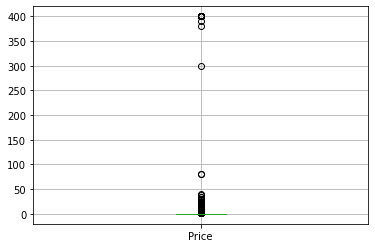

In [20]:
DfGoogle.boxplot(column=["Price"])

In [21]:
DfGoogle.Price.describe()

count    9353.000000
mean        0.961467
std        15.827539
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

Based on the above boxplot we can observe that there are apps with high prices (above $50). This should be treated as outliers

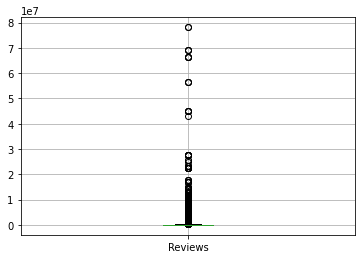

In [22]:
DfGoogle.boxplot(column=["Reviews"])

In [23]:
DfGoogle.Reviews.describe().apply(lambda x: format(x, "f"))

count        9353.000000
mean       514760.575858
std       3146168.746607
min             1.000000
25%           187.000000
50%          5967.000000
75%         81747.000000
max      78158306.000000
Name: Reviews, dtype: object

In [24]:
DfGoogle.Reviews.value_counts()

2.0          81
3.0          78
5.0          74
4.0          73
1.0          67
             ..
36490.0       1
768833.0      1
3252896.0     1
260651.0      1
1490732.0     1
Name: Reviews, Length: 5989, dtype: int64

The number of apps having a high number of reviews is low. We will treat any observation with more than 2 mil reviews as an outlier.

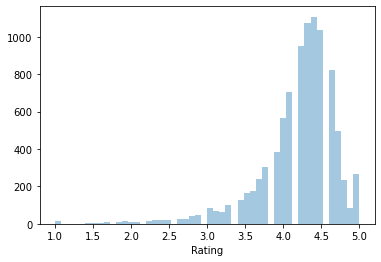

In [25]:
sns.distplot(DfGoogle["Rating"],kde=False)

We can observe that most of the apps have a higher rating

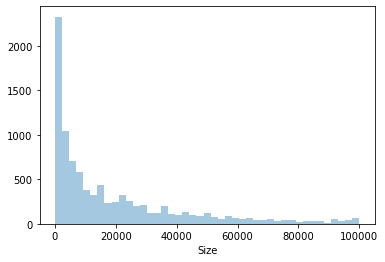

In [26]:
sns.distplot(DfGoogle["Size"],kde=False)

Majority of the apps have a small size

6. Outlier treatment:   
    1. Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!  
        1. Check out the records with very high price  
            1. Is 200 indeed a high price?  
        2. Drop these as most seem to be junk apps  

In [27]:
print("Removing apps with price higher than $200")

Removing apps with price higher than $200


In [28]:
DfGoogle.drop(DfGoogle[DfGoogle.Price > 200].index, inplace=True)

    B. Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews. 

In [29]:
DfGoogle.drop(DfGoogle[DfGoogle.Reviews > 2_000_000].index, inplace=True)

    C. Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis. 
        a. Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99  
        b. Decide a threshold as cutoff for outlier and drop records having values more than that

In [30]:
print("10th percentile of Installs : ", 
       np.percentile(DfGoogle.Installs, 10))
print("25th percentile of Installs : ",
       np.percentile(DfGoogle.Installs, 25))
print("50th percentile of Installs : ",
       np.percentile(DfGoogle.Installs, 50))
print("70th percentile of Installs : ", 
       np.percentile(DfGoogle.Installs, 70))
print("90th percentile of Installs : ",
       np.percentile(DfGoogle.Installs, 90))
print("95th percentile of Installs : ",
       np.percentile(DfGoogle.Installs, 95))
print("99th percentile of Installs : ",
       np.percentile(DfGoogle.Installs, 99))

10th percentile of Installs :  1000.0
25th percentile of Installs :  10000.0
50th percentile of Installs :  500000.0
70th percentile of Installs :  1000000.0
90th percentile of Installs :  10000000.0
95th percentile of Installs :  10000000.0
99th percentile of Installs :  100000000.0


In [31]:
Q1 = DfGoogle['Installs'].quantile (0.25)
Q3 =DfGoogle['Installs'].quantile (0.75)
IQR = Q3 - Q1
print("We will dropp observations with installs more than: " ,IQR)

We will dropp observations with installs more than:  4990000.0


In [32]:
DfGoogle.drop(DfGoogle[DfGoogle.Installs > 4990000].index, inplace=True)

7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.  
    1. Make scatter plot/joinplot for Rating vs. Price  
        1. What pattern do you observe? Does rating increase with price?  

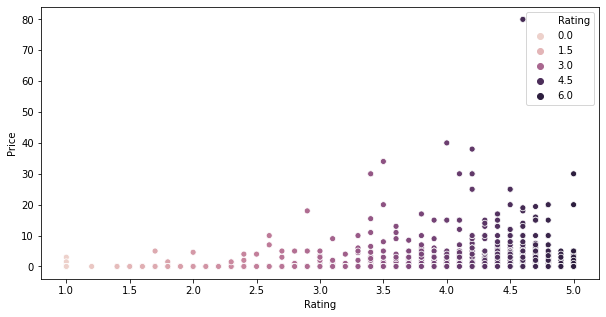

In [33]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=DfGoogle, x = "Rating", y="Price", hue="Rating")

We can observe that apps with a higher price tend to have a higher rating. Although there is a positive correlation betweeen the two variables, this is not a strong one (as we can see bellow)

In [34]:
np.corrcoef(DfGoogle.Rating, DfGoogle.Price)

array([[1.        , 0.03706793],
       [0.03706793, 1.        ]])

    B. Make scatter plot/joinplot for Rating vs. Size  
        a. Are heavier apps rated better?  

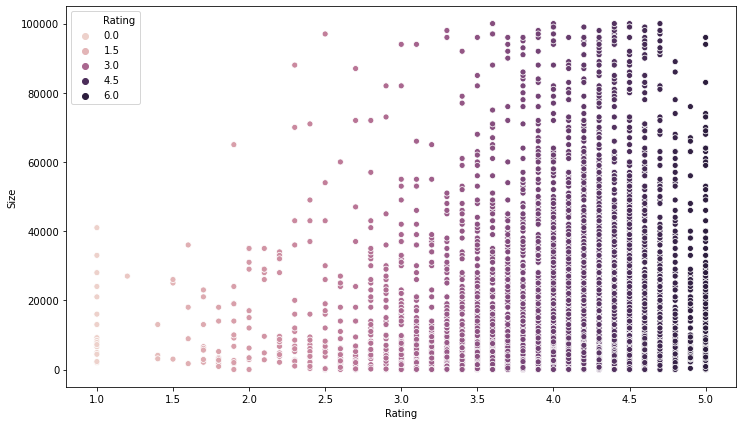

In [35]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=DfGoogle, x = "Rating", y="Size", hue="Rating")

It looks like better rated apps have a higher size, but again this has a verry low correlation

In [36]:
np.corrcoef(DfGoogle.Rating, DfGoogle.Size)

array([[1.        , 0.02078151],
       [0.02078151, 1.        ]])

    C. Make scatter plot/joinplot for Rating vs. Reviews  
        a. Does more review mean a better rating always?  

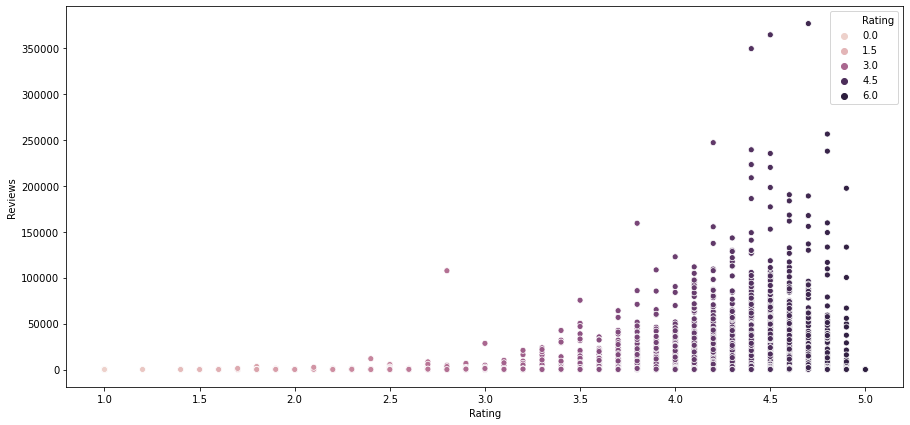

In [37]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=DfGoogle, x = "Rating", y="Reviews", hue="Rating")

Most of the apps that have a high rating have a higher number of reviews. Although there is not a strong correlation between these two variables.

In [38]:
np.corrcoef(DfGoogle.Rating, DfGoogle.Reviews)

array([[1.        , 0.14326175],
       [0.14326175, 1.        ]])

    D. Make boxplot for Rating vs. Content Rating  
        a. Is there any difference in the ratings? Are some types liked better? 

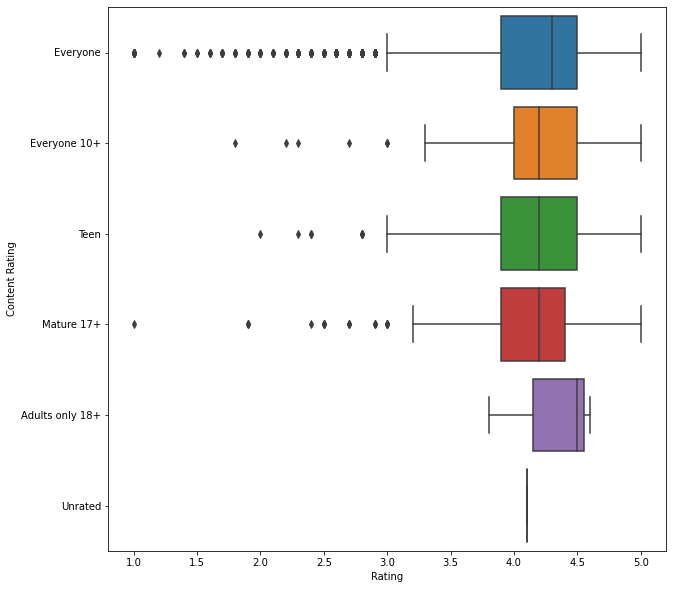

In [39]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Rating", y="Content Rating", data=DfGoogle)

For all the apps tha majority of the observations have a rating between 4 and 4.5. We can observe that for the content 'Adults ony 18+' the median is comparable higher than for the others content categories

    E. Make boxplot for Ratings vs. Category  
        a. Which genre has the best ratings?  

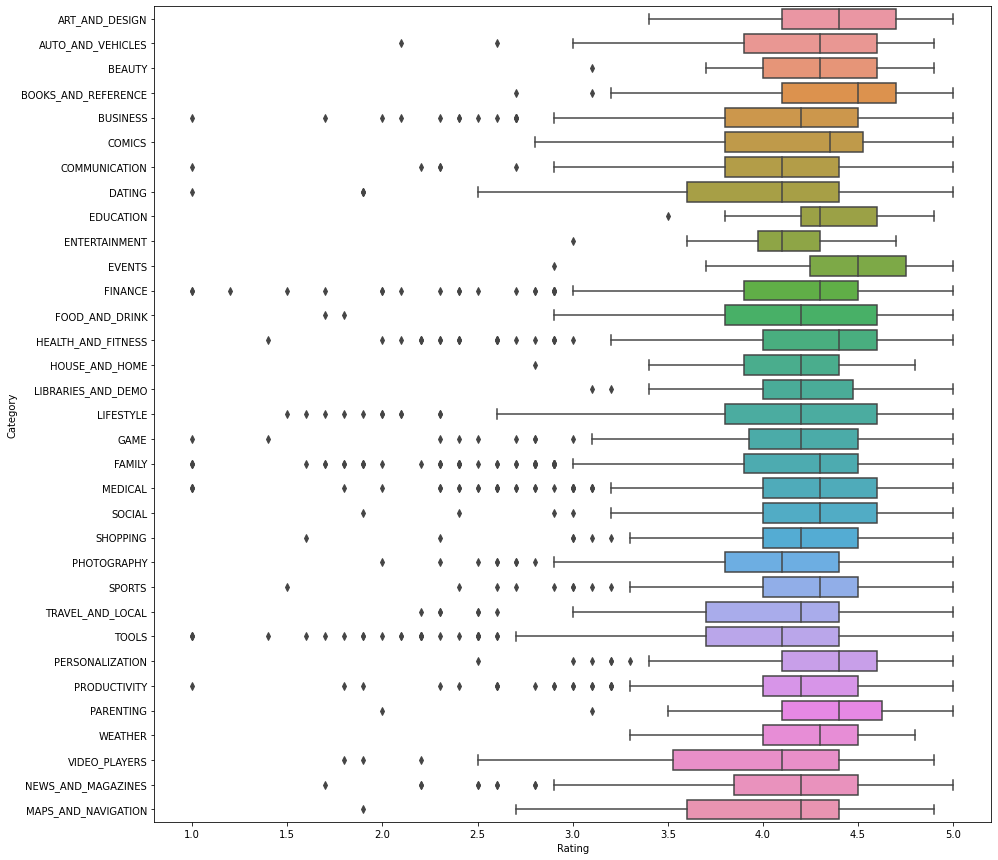

In [40]:
plt.figure(figsize=(15,15))
sns.boxplot(x="Rating", y="Category", data=DfGoogle)

The apps in the ' Books and Reference', 'Events', 'Personalization' and 'Parenting' categories have the highest median in ratings.

8. Data preprocessing  
For the steps below, create a copy of the dataframe to make all the edits. Name it **inp1**.  
    1. Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.  
    2. Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.  
    3. Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2. 

In [41]:
inp1 = DfGoogle.copy()
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178.0,19000.0,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up


In [42]:
inp1.Reviews = inp1.Reviews.apply(func = np.log1p)
inp1.Installs = inp1.Installs.apply(func = np.log1p)

In [43]:
inp1.drop(["App" , "Type" , "Last Updated" , "Current Ver" , "Android Ver"], inplace = True, axis = 1)

In [44]:
inp1.head()
inp1.reset_index()

,index,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,0.0,Everyone,Art & Design
1,1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,0.0,Everyone,Art & Design;Pretend Play
2,4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,0.0,Everyone,Art & Design;Creativity
3,5,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,0.0,Everyone,Art & Design
4,6,ART_AND_DESIGN,3.8,5.187386,19000.0,10.819798,0.0,Everyone,Art & Design
...,...,...,...,...,...,...,...,...,...
6501,9354,BOOKS_AND_REFERENCE,4.8,3.806662,619.0,6.908755,0.0,Everyone,Books & Reference
6502,9355,FAMILY,4.0,2.079442,2600.0,6.216606,0.0,Everyone,Education
6503,9356,FAMILY,4.5,3.663562,53000.0,8.517393,0.0,Everyone,Education
6504,9357,FAMILY,5.0,1.609438,3600.0,4.615121,0.0,Everyone,Education


In [45]:
inp2 = pd.get_dummies(data=inp1, columns = ["Category", "Genres", "Content Rating"])

In [46]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19000.0,9.210440,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,3.8,5.187386,19000.0,10.819798,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.
10. Separate the dataframes into X_train, y_train, X_test, and y_test.  

In [47]:
df_train, df_test = train_test_split(inp2, train_size = 0.7, random_state = 1)
y_train = df_train.pop("Rating")
X_train = df_train
y_test = df_test.pop("Rating")
X_test = df_test

11. Model building  
    * Use linear regression as the technique  
    * Report the R2 on the train set  

In [48]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [49]:
y_train_pred= LR.predict(X_train)
r2_score(y_train, y_train_pred)

0.14478390348138903

12. Make predictions on test set and report R2.

In [50]:
y_test_pred= LR.predict(X_test)
r2_score(y_test, y_test_pred)

0.1214723087670132

For both train and test sets we have a low R squared. We might need to look back and try to improve the model.